In [ ]:
pip install google-generativeai

In [ ]:
pip install langchain

In [ ]:
pip install google-cloud-aiplatform langchain-google-vertexai

In [ ]:
!pip install langchain_google_genai

In [ ]:
!pip install -U langchain-community

In [ ]:
pip install langchain langchain-google-vertexai wikipedia

# Basic LangChain

In [ ]:
import google.generativeai as genai

# Set your API key
genai.configure(api_key="xxxx")

# Initialize model
model = genai.GenerativeModel('gemini-1.5-flash')

# Generate a name
response = model.generate_content("I want to open a restaurant for Italian food. Suggest a fancy name for this.")

# Print the result
print(response.text)


## Fancy Names for an Italian Restaurant:

**Evoking Elegance & Tradition:**

*  Casa di Luna (House of the Moon)
*  La Bella Tavola (The Beautiful Table)
*  Trattoria del Sole (Trattoria of the Sun)
*  Il Giardino Segreto (The Secret Garden)
*  Ristorante Fiorentino (Florentine Restaurant) -  if specializing in Florentine cuisine
*  Amici di Venezia (Friends of Venice) - if Venetian-inspired
*  Palazzo Vecchio (Old Palace)
*  La Vigna Dorata (The Golden Vineyard)


**More Modern & Chic:**

*  Amalfi Coast Kitchen
*  Cinque Terre Cucina
*  Nero & Oro (Black & Gold)
*  Sotto le Stelle (Under the Stars)
*  The Roman Table
*  Aperitivo & Co.
*  The Olive & Vine
*  Basil & Bloom


**Names with a Playful Twist:**

*  Pasta La Vista, Baby! (Slightly cheeky, but memorable)
*  Buon Appetito Bistro
*  Mangia! (Eat!) - simple, yet effective
*  The Little Italy


**Before choosing, consider:**

* **Your restaurant's specific style:** Is it rustic, modern, romantic, etc.?
* **Your target audience:

In [ ]:
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(
    input_variables=['cuisine'],
    template="I want to open a restaurant for {cuisine} food. Suggest a fancy name"
)

# Format the prompt with a specific cuisine
formatted_prompt = prompt_template_name.format(cuisine="Indian")

print(formatted_prompt)


I want to open a restaurant for Indian food. Suggest a fancy name


In [ ]:
from langchain.chains import LLMChain
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains import SequentialChain
# Use the LangChain wrapper for the Gemini model
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", google_api_key="xxxx")


In [ ]:
# from langchain.prompts import PromptTemplate
# from langchain.chains import LLMChain, SequentialChain

# 1. Restaurant name generator chain
prompt_template_name = PromptTemplate(
    input_variables=['cuisine'],
    template="I want to open a restaurant for {cuisine} food. Suggest only 1 name"
)
restaurent_chain = LLMChain(
    llm=llm,
    prompt=prompt_template_name,
    output_key="restaurent_name"  # <- required for sequential chaining
)

# 2. Menu item generator chain
prompt_template_items = PromptTemplate(
    input_variables=['restaurent_name'],
    template="Suggest some menu items for {restaurent_name}"
)
food_items_chain = LLMChain(
    llm=llm,
    prompt=prompt_template_items,
    output_key="menu_items"  # <- final output
)

# 3. Combine into SequentialChain
chain = SequentialChain(
    chains=[restaurent_chain, food_items_chain],
    input_variables=["cuisine"],                    # input to first chain
    output_variables=["restaurent_name", "menu_items"],  # final outputs
    verbose=True
)

# 4. Run the chain
response = chain({"cuisine": "Indian"})
print(response)


/tmp/ipython-input-251896131.py:9: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  restaurent_chain = LLMChain(
/tmp/ipython-input-251896131.py:35: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = chain({"cuisine": "Indian"})




> Entering new SequentialChain chain...

> Finished chain.
{'cuisine': 'Indian', 'restaurent_name': 'Masala Trails', 'menu_items': "Masala Trails suggests a journey through Indian cuisine.  Therefore, the menu should reflect regional diversity and offer a range of flavors and spice levels. Here are some menu item suggestions, categorized for clarity:\n\n**Starters/Appetizers:**\n\n* **North Indian:**  Paneer Tikka (classic), Dahi Puri (tangy), Aloo Tikki Chaat (savory), Samosas (with chutney options)\n* **South Indian:**  Idli Sambar (light & flavorful), Masala Dosa (crispy crepe), Medu Vada (savory lentil fritter)\n* **West Indian:**  Sev Puri (crispy & spicy), Dabeli (sweet & spicy potato patty)\n* **East Indian:**  Fish Paturi (steamed fish in banana leaf), Kosha Mangsho (mutton curry)\n\n\n**Main Courses:**\n\n* **North Indian:** Butter Chicken (creamy tomato-based), Rogan Josh (Kashmiri lamb curry), Dal Makhani (creamy black lentil), Palak Paneer (spinach & cheese)  – offer both

In [ ]:
pip install langchain langchain-google-vertexai wikipedia

In [ ]:
pip install -U langchain-community

# LangChain with Tools

In [ ]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain_google_vertexai import ChatVertexAI
import os

# Initialize Gemini (e.g., Gemini 1.5 Flash)
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", google_api_key="xxxx")

from langchain.tools import Tool

def basic_math_tool(query: str) -> str:
    try:
        return str(eval(query))
    except:
        return "Error evaluating math expression."

math_tool = Tool(
    name="basic_math",
    func=basic_math_tool,
    description="Performs basic math. Input should be a valid Python expression like '2 + 2'."
)


# Load only tools that do not depend on OpenAI
tools = load_tools(["wikipedia"]) + [math_tool] # You can add custom tools if needed

# Initialize agent
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Run a test
response = agent.run("Who is the president of India? and calculate her age")
print(response)


/tmp/ipython-input-3129840801.py:27: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = initialize_agent(
/tmp/ipython-input-3129840801.py:35: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = agent.run("Who is the president of India? and calculate her age")




> Entering new AgentExecutor chain...
Thought: I need to find out who the president of India is using Wikipedia, and then I need to find her birthdate to calculate her age.  I'll need to use Wikipedia for the name and birthdate, and then basic_math to calculate her age.

Action: wikipedia
Action Input: President of India
Observation: Page: President of India
Summary: The president of India  (ISO: Bhārata kē Rāṣṭrapati) is the head of state of the Republic of India. The president is the nominal head of the executive, the first citizen of the country, and the supreme commander of the Indian Armed Forces. Droupadi Murmu is the 15th and current president, having taken office on 25 July 2022.
The office of president was created when India's  constitution came into force and it became a republic on 26 January 1950. The president is indirectly elected by an electoral college comprising both houses of the Parliament of India and the legislative assemblies of each of India's states and territ

In [ ]:
import langchain.agents as agents
print(dir(agents))  # Check if 'load_tools' is listed

['Agent', 'AgentExecutor', 'AgentExecutorIterator', 'AgentOutputParser', 'AgentType', 'Any', 'BaseMultiActionAgent', 'BaseSingleActionAgent', 'ConversationalAgent', 'ConversationalChatAgent', 'DEPRECATED_CODE', 'DEPRECATED_LOOKUP', 'LLMSingleActionAgent', 'MRKLChain', 'OpenAIFunctionsAgent', 'OpenAIMultiFunctionsAgent', 'Path', 'ReActChain', 'ReActTextWorldAgent', 'SelfAskWithSearchChain', 'StructuredChatAgent', 'TYPE_CHECKING', 'Tool', 'XMLAgent', 'ZeroShotAgent', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_import_attribute', 'agent', 'agent_iterator', 'agent_toolkits', 'agent_types', 'as_import_path', 'chat', 'conversational', 'conversational_chat', 'create_importer', 'create_json_chat_agent', 'create_openai_functions_agent', 'create_openai_tools_agent', 'create_react_agent', 'create_self_ask_with_search_agent', 'create_structured_chat_agent', 'create_tool_calling_agent', 'create_vec

# Simple LangGraph (linear graph)
 - here it will convert usd to inr
 - It is having 2 nodes and 3 edges

In [ ]:
!pip install langgraph

In [ ]:
from typing import TypedDict

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_amt: float

In [ ]:
myobj = PortfolioState(amount_usd=100, amount_inr=200, total_amt=300)

In [ ]:
def calc_total(state: PortfolioState) -> PortfolioState:
  state['total_usd'] = state['amount_usd'] * 1.08
  return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
  state['total_amt'] = state['total_usd'] * 85
  return state

In [ ]:
from langgraph.graph import StateGraph, START, END
builder = StateGraph(PortfolioState)
builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_inr_node", convert_to_inr)
builder.add_edge(START, "calc_total_node")
builder.add_edge("calc_total_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END)

graph = builder.compile()

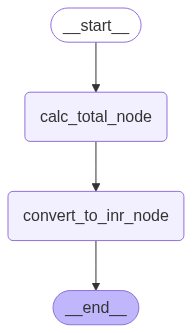

In [ ]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"amount_usd": 100})

{'amount_usd': 100, 'total_usd': 108.0, 'total_amt': 9180.0}

# Conditional LangGraph
- It will convert the to different currency based on the user input

In [ ]:
from typing import TypedDict, Literal

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total: float
    target_currency : Literal["INR", "EUR"]

In [ ]:
def calc_total(state: PortfolioState) -> PortfolioState:
  state['total_usd'] = state['amount_usd'] * 1.08
  return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
  state['total'] = state['total_usd'] * 85
  return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
  state['total'] = state['total_usd'] * .95
  return state

def choose_conversion(state: PortfolioState) -> str:
  return state['target_currency']

In [ ]:
from langgraph.graph import StateGraph, START, END
builder = StateGraph(PortfolioState)
builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_inr_node", convert_to_inr)
builder.add_node("convert_to_eur_node", convert_to_eur)

builder.add_edge(START, "calc_total_node")
builder.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
    {
        "INR": "convert_to_inr_node",
        "EUR": "convert_to_eur_node"
    }
)

builder.add_edge(["convert_to_inr_node", "convert_to_eur_node"], END)

graph = builder.compile()

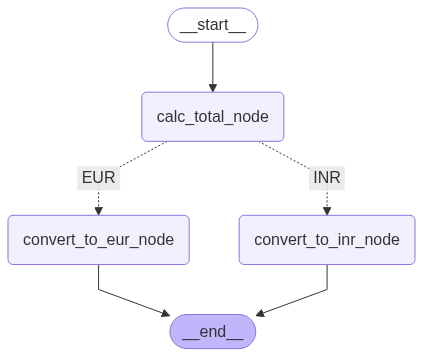

In [ ]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"amount_usd": 100, "target_currency": "EUR"})

{'amount_usd': 100,
 'total_usd': 108.0,
 'total': 102.6,
 'target_currency': 'EUR'}

# Chatbot

## Simple Chatbot

In [ ]:
from typing_extensions import TypedDict
from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing import Annotated

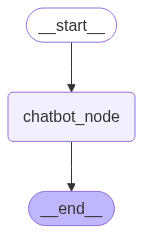

In [ ]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain_google_vertexai import ChatVertexAI
from langchain_google_genai import ChatGoogleGenerativeAI
import os

# Initialize Gemini (e.g., Gemini 1.5 Flash)
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", google_api_key="xxxx")

# llm.invoke("who invented gravity")


class State(TypedDict):
  messages: Annotated [list, add_messages]

def chatbot(state: State) -> State:
  return {"messages": [llm.invoke(state["messages"]) ]}

builder = StateGraph(State)
builder.add_node("chatbot_node", chatbot)
builder.add_edge(START, "chatbot_node")
builder.add_edge("chatbot_node", END)
graph = builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
message = {"role": "user", "content": "Who walked on the moon for the first time? Print only the name"}
response = graph.invoke({"messages" : [message]})

response ["messages" ]

[HumanMessage(content='Who walked on the moon for the first time? Print only the name', additional_kwargs={}, response_metadata={}, id='f1b10536-dac1-4657-a87d-7b7c7fd63edf'),
 AIMessage(content='Neil Armstrong', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--affb66b9-e689-42f0-b8dc-06c9b5df6b44-0', usage_metadata={'input_tokens': 14, 'output_tokens': 3, 'total_tokens': 17, 'input_token_details': {'cache_read': 0}})]

In [ ]:
state = None
while True:
  in_message = input("You: ")
  if in_message. lower() in {"quit", "exit"}:
    break
  if state is None:
    state: State = {"messages": [{"role": "user", "content": in_message}]}
  else:
    state ["messages"]. append ({"role": "user","content": in_message})

  state = graph. invoke(state)
  print ("Bot:", state["messages"][-1].content)

You: who is father of india
Bot: The term "Father of India" is most commonly associated with **Mahatma Gandhi**.  While he didn't hold any official title, his leadership of the Indian independence movement and his profound influence on the nation's philosophy and identity earned him this title.  It's important to note that many other leaders played crucial roles in India's independence, and attributing this title to a single person simplifies a complex historical process.
You: when he born
Bot: Mahatma Gandhi was born on **October 2, 1869**.
You: what is 2 + 2
Bot: 2 + 2 = 4
You: when he died
Bot: Mahatma Gandhi died on **January 30, 1948**.
You: thanks
Bot: You're welcome!  Is there anything else I can help you with?
You: no
Bot: Okay, have a great day!
You: who is her wife
Bot: Mahatma Gandhi's wife was **Kasturbai Mohandas Gandhi**.
You: wxit
Bot: I believe you may have misspelled "exit."  If you'd like to end our conversation, just let me know.  If you have any other questions, I'm

## Chatbot with tool integration

In [ ]:
from typing_extensions import TypedDict
from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing import Annotated
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain_google_vertexai import ChatVertexAI
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

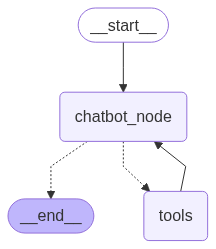

In [ ]:
@tool
def get_stock_price(symbol: str) -> float:
  '''Return the current price of a stock given the stock symbol example (GOOGLE,AAPL, AMZN, TATA)
  :param symbol: stock symbol
  :return: current price of the stock
  '''
  return {
      "GOOGLE" : 200.3,
      "AAPL": 100.4,
      "AMZN": 150.0,
      "TATA": 87.6
}.get(symbol, 0.0)

# ✨ NEW TOOL
@tool
def get_person_full_name(code: str) -> str:
    """Return the full name of a person for a given short code.

    :param code: abbreviation / initials / handle
    :return: full name of the person
    """
    directory = {
        "APJ": "Avul Pakir Jainulabdeen Abdul Kalam",
        "SRK": "Shah Rukh Khan",
        "MSD": "Mahendra Singh Dhoni",
        "TS":  "Taylor Swift",
    }
    return directory.get(code.upper(), "")


tools = [get_stock_price, get_person_full_name]
memory = MemorySaver() # defining memory obj

# Initialize Gemini (e.g., Gemini 1.5 Flash)
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", google_api_key="xxxx")

llm_with_tools = llm.bind_tools(tools)

class State(TypedDict):
  messages: Annotated [list, add_messages]

def chatbot(state: State) -> State:
  return {"messages": [llm_with_tools.invoke(state["messages"]) ]}

builder = StateGraph(State)
builder.add_node("chatbot_node", chatbot)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "chatbot_node")
builder.add_conditional_edges("chatbot_node", tools_condition)
builder.add_edge("tools", "chatbot_node")
# builder. add_edge("chatbot_node", END)

graph = builder.compile(checkpointer = memory)

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))


* **Issue with this approach is if i ask to perform 2 3 operation on tools it is not able to figure it out, so add the reverse node from tool to chatbot**

 - ` builder.add_edge("tools", "chatbot_node") `

* Add the memory to agent to remember past conversion
 - `from langgraph.checkpoint.memory import MemorySaver`
 ```
 memory = MemorySaver()
 ```


In [ ]:
config = {'configurable' : {"thread_id" : 1}}
state = graph.invoke({"messages" : [{"role": "user", "content": "what is the full name of APJ"}]}, config = config)
print(state['messages'][-1].content)
# print(state)

The full name of APJ is Avul Pakir Jainulabdeen Abdul Kalam.


In [ ]:
state = graph.invoke({"messages" : [{"role": "user", "content": "what is total  stock price of GOOGLE and TATA"}]},  config = config)
print(state['messages'][-1].content)
# print(state)

The stock price of GOOGLE is $200.3 and the stock price of TATA is $87.6.  Therefore, the total stock price of both is $287.9.


In [ ]:
state = graph.invoke({"messages" : [{"role": "user", "content": "can u also add the AAPL stock price"}]},  config = config)
print(state['messages'][-1].content)

The stock price of AAPL is $100.4.  Therefore, the total stock price of GOOGLE, TATA, and AAPL is $200.3 + $87.6 + $100.4 = $388.3


In [ ]:
state = graph.invoke({"messages" : [{"role": "user", "content": "what is the full name of APJ and stock price of GOOGLE"}]},  config = config)
print(state['messages'][-1].content)
# print(state)

The full name of APJ is Avul Pakir Jainulabdeen Abdul Kalam and the stock price of GOOGLE is $200.3.


* Now we can say workflow is agentic

# Human in the loop (HITL)
 - Agent will ask for human approval for doing critical task
 - Here we are intrupting tool agentic call and it will be resumed by human approval
 - To achive this we will we `interrupt` and `resume` from langgraph

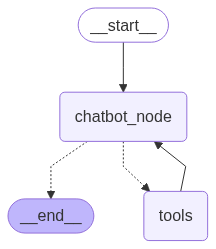

In [ ]:
from typing_extensions import TypedDict
from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing import Annotated
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain_google_vertexai import ChatVertexAI
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver
from langgraph.types import interrupt, Command

# this will maintain the state of graph
class State(TypedDict):
  messages: Annotated [list, add_messages]

@tool
def get_stock_price(symbol: str) -> float:
  '''Return the current price of a stock given the stock symbol example (GOOGLE,AAPL, AMZN, TATA)
  :param symbol: stock symbol
  :return: current price of the stock
  '''
  return {
      "GOOGLE" : 200.3,
      "AAPL": 100.4,
      "AMZN": 150.0,
      "TATA": 87.6
}.get(symbol, 0.0)

@tool
def get_person_full_name(code: str) -> str:
    """Return the full name of a person for a given short code.

    :param code: abbreviation / initials / handle
    :return: full name of the person
    """
    directory = {
        "APJ": "Avul Pakir Jainulabdeen Abdul Kalam",
        "SRK": "Shah Rukh Khan",
        "MSD": "Mahendra Singh Dhoni",
        "TS":  "Taylor Swift",
    }
    return directory.get(code.upper(), "")

@tool
def buy_stocks (symbol: str, quantity: int, total_price: float) -> str:
  '''Buy stocks given the stock symbol and quantity'''
  decision = interrupt(f"Approve buying {quantity} shares of {symbol} for a total price of {total_price}")

  if decision == 'yes':
    return f"You bought {quantity} shares of {symbol} for a total price of {total_price}"
  else:
    return f"You decided not to buy {quantity} shares of {symbol} for a total price of {total_price}"

tools = [get_stock_price, get_person_full_name, buy_stocks]
memory = MemorySaver() # defining memory obj

# Initialize Gemini
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", google_api_key="xxxx")

llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State) -> State:
  return {"messages": [llm_with_tools.invoke(state["messages"]) ]}

builder = StateGraph(State)
builder.add_node("chatbot_node", chatbot)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "chatbot_node")
builder.add_conditional_edges("chatbot_node", tools_condition)
builder.add_edge("tools", "chatbot_node")
# builder. add_edge("chatbot_node", END)

graph = builder.compile(checkpointer = memory)

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
state = graph.invoke({"messages" : [{"role": "user", "content": "buy 10 shared of AAPL stock at current price"}]},  config = config)
print(state['messages'][-1].content)

decision = input("Approve (yes/no)")
state = graph.invoke(Command(resume=decision), config = config)
print(state['messages'][-1].content)



Approve (yes/no)no
OK. You decided not to buy 10 shares of AAPL for a total price of 1004.0.
